In [6]:
import cv2 

In [4]:
!pip install opencv-python

In [2]:
!pip install numpy


Reading Images and Learning few Basic Image Processing


In [7]:
# Importing Opencv Lib & Numpy Lib
import cv2
import numpy as np
 
# Read the Image
img = cv2.imread('Mobile.jpg')
 
# Print the image 
print(img)

[[[ 50  63 101]
  [ 50  63 101]
  [ 50  63 101]
  ...
  [ 47  30  43]
  [ 47  30  43]
  [ 47  30  43]]

 [[ 52  65 103]
  [ 50  66 103]
  [ 52  65 103]
  ...
  [ 47  30  43]
  [ 47  30  43]
  [ 47  30  43]]

 [[ 53  69 106]
  [ 51  69 106]
  [ 53  69 106]
  ...
  [ 45  31  43]
  [ 45  31  43]
  [ 45  31  43]]

 ...

 [[ 48  36  58]
  [ 47  35  57]
  [ 46  34  56]
  ...
  [ 43  25  32]
  [ 45  27  34]
  [ 47  29  36]]

 [[ 49  37  59]
  [ 48  36  58]
  [ 46  34  56]
  ...
  [ 44  28  35]
  [ 46  30  37]
  [ 47  33  39]]

 [[ 47  37  60]
  [ 46  36  59]
  [ 45  35  58]
  ...
  [ 44  29  37]
  [ 45  30  38]
  [ 44  31  39]]]


In [8]:
img.shape

(605, 910, 3)

In [9]:
cv2.imshow("Mobile phone",img)
# Wait for the user to press any key
cv2.waitKey(0)
 
# Destroy all windows
cv2.destroyAllWindows()

NOTE: Colour in BGR format
1. cv2.line(image, start_point, end_point, color, thickness)
2. cv2.circle(image, center, radius, color, thickness)
3. cv2.rectangle(image, start_point, end_point, color, thickness)
4. cv2.putText(image, text, bottom-left corner coordinates , fontFace, fontScale, color, thickness)  #cv2.FONT_HERSHEY_SIMPLEX is used for a basic font


In [10]:
copy = img.copy()
 
# Draw a line on the image with these parameters.
cv2.line(copy, (400,250),(300,30), (255,255,0), 5) 
cv2.circle(copy, (360,200), 100, (255,100,0), 5)
cv2.rectangle(copy, (250,100), (450,300), (0,255,0),3)
cv2.putText(img,'Hi!',(100,100),cv2.FONT_HERSHEY_SIMPLEX, 1.7, (255,255,0), 4)

# Display image
cv2.imshow("Draw Line", copy);
cv2.waitKey(0)
cv2.destroyAllWindows()


Image Processing <Blurring , Enhancing Image>


1. Grayscale Conversion:
   

In [33]:
copy = img.copy()

# Convert to grayscale
gray_img = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
cv2.imshow('Original Image', copy)
cv2.imshow('Grayscale Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Blurring an Image (Gaussian): (After Gray Scale)

   cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma_x, sigma_y=sigma_x, borderType=border_type)  { sigma=standard deviation }
   
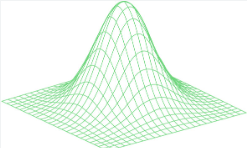 

In [35]:
copy = img.copy()

# Apply a Gaussian blur (kernel size 5x5
gray_img = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)

blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Display the original and blurred images
cv2.imshow('Original Image', copy)
cv2.imshow('Blurred Image', blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3. Edge Detection:
   
   cv2.Canny(image, threshold1, threshold2, [apertureSize=aperture_size, L2gradient=L2gradient])
   1. threshold1: Lower threshold for edge intensity.
   2. threshold2: Upper threshold for edge intensity.
   3. apertureSize (optional): Size of the Sobel operator kernel (e.g., 3, 5, 7).
   4. L2gradient (optional): Whether to use the second derivative of the Gaussian filter (True) or not (False).
      
      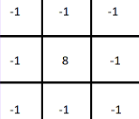

In [11]:
copy = img.copy()

# Convert to grayscale for better edge detection and Blur to avoid Noise

gray_img = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (5, 3), 0)

# Apply Canny edge detection
edges = cv2.Canny(gray_img, 100, 200)

# Display the original image and detected edges
cv2.imshow('Original Image', img)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Thresholding:

   
    ret, thresholded_image = cv2.threshold(image, threshold_value, max_value, threshold_type)
    1. threshold_value: Threshold intensity value.
    2. max_value: Value assigned to pixels above the threshold (e.g., 255 for white).
    3. threshold_type: Type of thresholding operation (e.g., cv2.THRESH_BINARY).

In [16]:
copy = img.copy()

# Convert to grayscale for better edge detection
gray_img = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_img, 100, 200)

# Apply thresholding (adjust threshold and max_value as needed)
thresh, thresholded_image = cv2.threshold(gray_img, 33, 255, cv2.THRESH_BINARY)

# Display the original image, detected edges, and thresholded image
cv2.imshow('Original Image', copy)
cv2.imshow('Edges', edges)
cv2.imshow('Thresholded Image', thresholded_image)

# Wait for a key press to close windows
cv2.waitKey(0)

cv2.destroyAllWindows()
# print(thresh)

33.0


_

Detecting the object(Mobile) in the frame

Contours Function:
1. cv2.findContours(image, retrieval_mode, approximation_method)
    1. Retrieval Mode (int): How to find contours:
        1. cv2.RETR_EXTERNAL (default): Outermost boundaries of objects (like island coastlines).
        2. cv2.RETR_LIST: All contours, including holes within objects.
    2. Approximation Method (int): How to store contours (affects memory & speed):
        1. cv2.CHAIN_APPROX_SIMPLE (default): Stores few turning where much change in direction is observed (less memory, faster).
        2. cv2.CHAIN_APPROX_NONE: Stores all points (more memory, slower).
           
NOTE: For basic shape analysis, use cv2.RETR_EXTERNAL and cv2.CHAIN_APPROX_SIMPLE to identify external objects with minimal memory usage.For detailed analysis of objects with holes, use cv2.RETR_LIST and all boundary points (cv2.CHAIN_APPROX_NONE) if precision is crucial.
For analyzing nested shapes, use cv2.RETR_CCOMP with an appropriate approximation method based on your needs.


2. cv2.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel):
   
   1. contourIdx (int): This specifies which contour(s) to draw.
       1. -1 (default): Draws all contours in the contours list.
       2. Non-negative integer: Draws the contour at the corresponding index in the contours list.
   2. color (Scalar): (BGR),alpha (transparency).(255, 0, 0, 128) (half-transparent red).
   3. lineType (int): Common options:
      1. cv2.LINE_8 (default): 8-connected line (commonly used)
      2. cv2.LINE_AA (anti-aliased line): Smoother lines (may be slower)
   4. hierarchy (optional, 2D list): Information about the hierarchy of contours (useful for nested shapes, often None for basic drawing).
   5. maxLevel (int, optional): Maximum level of hierarchy to draw (usually 0 to draw all levels).

In [24]:
import cv2

# Loading the image 
try:
    img = cv2.imread('Mobile.jpg')
    if img is None:
        print("Error: Could not read image file")
        exit()
except FileNotFoundError:
    print("Error: Image file not found")
    exit()
    
copy = img.copy()
copy1 = img.copy()

# Convert to grayscale for better contour detection
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding (adjust threshold and max_value as needed)
thresh, thresholded_image = cv2.threshold(gray_img, 33, 255, cv2.THRESH_BINARY_INV)

# inverted_image = cv2.bitwise_not(thresholded_image)

# Find contours
contours, hierarchy = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (255,255,0), 3)
# Draw contours and bounding boxes with labels (area limit added)
area_limit = 1000  # Minimum area for a contour to be considered
for cnt in contours:
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    # Calculate contour area
    contour_area = cv2.contourArea(cnt)

    # Only process contours with area greater than the limit
    if contour_area > area_limit:
        # Draw rectangle
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Put label (you can replace 'Object' with a class name)
        cv2.putText(img, 'Mobile', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Display the original image with contours and labels
cv2.imshow('Original Image', copy1)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.imshow('Image with Contours', img)

# Wait for a key press to close windows
cv2.waitKey(0)

# Clean up resources
cv2.destroyAllWindows()

print("Image processing finished.")
print("Object centred at :" , (x+w/2, y+h/2))

Image processing finished.
Object centred at : (156.0, 5.0)



Reading Video


In [12]:
import cv2 
cap = cv2.VideoCapture('Basket ball.mp4') #instead of path put numbers 0 for yours systems live webcam and 1 if ext second webcam is connected

# Check if video capture opened successfully
if not cap.isOpened():
    print("Error opening video stream or file")
    exit()

while (1):
    ret, frame = cap.read()
    if not ret:
        print("No Frames to read")
        break    
    resized_frame = cv2.resize(frame, (320, 240))     # Display the resized video frame in the named window
    cv2.imshow('Window',resized_frame)
    if cv2.waitKey(1) & 0xFF == 27:                   # Escape to go back
        break
cap.release()
cv2.destroyAllWindows()

Your Task :
1> Create a Contour Object Detection with a real life object...

2> Create a Motion Detector by comparing 2 frames of live WebCam and check for a difference and detect a change with time stamp. Also draw a bounding box where the change is detected on the OpenCV Window...
